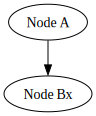

In [1]:
from graphviz import Digraph
from IPython.display import display, SVG

def display_graph():
    graph = Digraph('G', filename='graph.gv', format='svg', engine='dot')
    graph.node('A', 'Node A')
    graph.node('B', 'Node Bx')
    graph.edge('A', 'B')
    return graph

# Create the graph
graph = display_graph()

# Render the graph and display it in the notebook
display(SVG(graph.pipe().decode()))

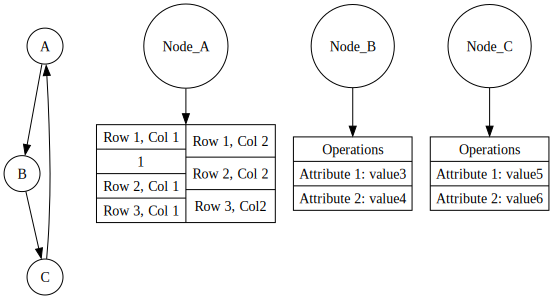

In [2]:
from graphviz import Source
dot_graph = """
digraph G {
    node [shape=circle];
    // rankdir=LR; // Set the layout direction to left-to-right

    A -> B;
    B -> C;
    C -> A;
    
    // Record-type nodes with associated attributes 
    A_label [shape=record, label="{Row 1, Col 1|1|Row 2, Col 1|Row 3, Col 1}|{Row 1, Col 2|Row 2, Col 2|Row 3, Col2}"];
    B_label [shape=record, label="{Operations|Attribute 1: value3|Attribute 2: value4}"];
    C_label [shape=record, label="{Operations|Attribute 1: value5|Attribute 2: value6}"];
 
    
    // Connections between nodes and corresponding record-type nodes
    Node_A -> A_label;
    Node_B -> B_label;
    Node_C -> C_label;
}
"""

# Create a Source object from the DOT format graph
source = Source(dot_graph, format='svg')

# Display the graph in the notebook
display(source)

In [3]:
import genai as ai

scraper = ai.Scraper();

ImportError: dlopen(/usr/local/lib/python3.11/site-packages/genai.abi3.so, 0x0002): symbol not found in flat namespace '__ZN10TokenModelIdE10trainGloVeERSt6vectorINSt7__cxx1112basic_stringIwSt11char_traitsIwESaIwEEESaIS7_EEidi'

In [ ]:
scraper.crawl('http://localhost:8888/notebooks/sample.html', 1);

In [1]:
import genai as ai

# Define the URLFrontier class wrapper in Python
class URLFrontier:
    def __init__(self, max_urls=1000, queue_address=''):
        self._urlfrontier = ai.URLFrontier(max_urls, queue_address.encode('utf-8'))

    def enqueue(self, url, priority_percentage):
        url_bytes = url.encode('utf-8')
        self._urlfrontier.enqueue(url_bytes, priority_percentage)

    def start_worker_threads(self):
        self._urlfrontier.startWorkerThreads()

# Example usage:
if __name__ == '__main__':
    url_frontier = URLFrontier(max_urls=100, queue_address='tcp://127.0.0.1:5555')

    # Enqueue URLs with priority percentages
    url_frontier.enqueue('http://example.com/page1', 80)
    url_frontier.enqueue('http://example.com/page2', 50)

    # Start worker threads
    url_frontier.start_worker_threads()

ImportError: dlopen(/usr/local/lib/python3.11/site-packages/genai.abi3.so, 0x0002): symbol not found in flat namespace '__ZN11URLFrontier10processUrlERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'

In [ ]:
class MyTokenModel(ai.BPETokenizer):

   def __init__(self):
     super().__init__();


tokenizer = ai.BPETokenizer();



In [5]:
import genai as ai
class MyModel(ai.BaseModel):

   def __init__(self):
     super().__init__();

     print("Creating a Graph!")
     graph = ai.Graph();

     print("Add Node 1 ...")
     embedding1 = [[1.0, 2.0, 3.0, 4.0], [3.0, 4.0, 5.0, 6.0]]
     node1 = graph.addNode("Node 1", ai.NodeType.Input, embedding1)
     node1.setOperations([ai.Encoder(heads=2, size=3, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.FeedForward(size=2, bias=True, type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Attention(heads=1, size=2, bias=False), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True), ai.BatchNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]);
     #node1.setOperations([ai.Linear(size=2, bias=True)]);

     print("Add Node 3 ...")
     node3 = graph.addNode("Node 3", ai.NodeType.Output)
     #node3.setOperations([ai.Linear(size=3, bias=True), ai.LayerNorm(), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     node3.setOperations([ai.Linear(size=3, bias=True), ai.Activation(type="leakyrelu", alpha=0.01)]) 
     #node3.setOperations([ai.Linear(size=3, bias=True)]) 
     # embedding = [[1.0, 2.0, 3.0], [3.0, 4.0, 6.0]]
     # graph.setData(embedding);

     # assign to the instance
     self.graph = graph;
     self.node1 = node1
     self.node3 = node3

     print("Connect nodes ...");
     self.graph.connect(self.node1, self.node3);

     self.setGraph(self.graph);

model = MyModel();


ImportError: dlopen(/usr/local/lib/python3.11/site-packages/genai.abi3.so, 0x0002): symbol not found in flat namespace '__ZN10TokenModelIdE10trainGloVeERSt6vectorINSt7__cxx1112basic_stringIwSt11char_traitsIwESaIwEEESaIS7_EEidi'

In [ ]:
target = [[1.0, 2.0, 3.0], [3.0, 4.0, 5.0]];
model.setTarget(target);
model.train(loss="mse", optimizer="adam", learnrate=0.01, iter=20);

In [ ]:
mydot = model.graph.generateDotFormat()
mydot 

In [ ]:
from graphviz import Source

# Create a Source object from the DOT format graph
source = Source(mydot, format='svg')

# Display the graph in the notebook
display(source)